<a href="https://colab.research.google.com/github/Lalit767/Expedia_Case_Study/blob/main/ModelFitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                           Model  R² Score        RMSE
1  Polynomial Regression (deg=2)  0.998255  239.006235
2                  Random Forest  0.998026  254.183301
0              Linear Regression  0.990177  567.014910


<ipython-input-3-57c2ea19a398>:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="R² Score", y="Model", palette="Set2")


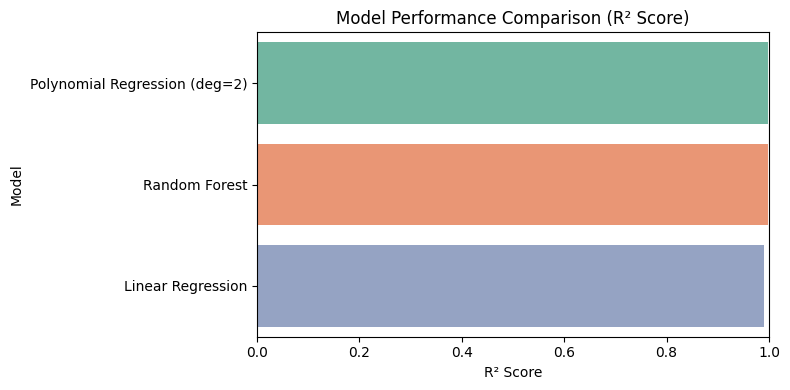

In [3]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/sample_data/HCOM_Analytics_Insights_Case_Study_Dataset.csv")

# ----`Data Information ------
df.info()
df.describe()

# Step 1: Remove rows with invalid dates
df = df[pd.to_datetime(df['Date'], errors='coerce').notna()].copy()


# Step 2: Remove duplicate rows
df = df.drop_duplicates()

# Step 3: Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Columns to check
numeric_columns = ['Visits', 'Qualified Shoppers', 'Bounced Visits', 'Gross Orders', 'Net Orders', 'Net Room Nights']


# Encode categorical columns
df_encoded = df.copy()
for col in ['Geographic Region', 'Platform', 'Marketing Channel']:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Drop Date and define features/target
X = df_encoded.drop(columns=["Net Room Nights", "Date"])
y = df_encoded["Net Room Nights"]

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Store model results
results = []

### 1. Linear Regression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)
results.append({
    "Model": "Linear Regression",
    "R² Score": r2_score(y_test, y_pred_lin),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_lin))
})

### 2. Polynomial Regression (degree=2)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)
results.append({
    "Model": "Polynomial Regression (deg=2)",
    "R² Score": r2_score(y_test, y_pred_poly),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_poly))
})

### 3. Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
results.append({
    "Model": "Random Forest",
    "R² Score": r2_score(y_test, y_pred_rf),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_rf))
})

# Convert results to DataFrame and display
results_df = pd.DataFrame(results).sort_values(by="R² Score", ascending=False)
print(results_df)

# Optional: Plot
plt.figure(figsize=(8, 4))
sns.barplot(data=results_df, x="R² Score", y="Model", palette="Set2")
plt.title("Model Performance Comparison (R² Score)")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')